# Exercises XP Gold
Last Updated: February 10th, 2025

## 👩‍🏫 👩🏿‍🏫 What You’ll learn
Data wrangling and preparation for hypothesis testing
Visualizing data distributions and comparing group differences
Conducting independent two-sample t-tests for comparing means
Understanding assumptions for t-tests, including normality and homoscedasticity
Conducting One-Way ANOVA to compare multiple treatment groups and performing post-hoc tests


## 🛠️ What you will create
Analyzing gender differences in student performance across Math, Reading, and Writing
Conducting t-tests to compare performance scores between males and females


## For today’s XP Gold Exercises, we will predict how various factors such as gender, test preparation, and lunch status influence student performance in Math, Reading, and Writing scores.
Please stop the exercise when you see “XP Ninja” in the notebook :)



## Dataset
Students Performance



## What you need to do :
You will find here a google colaboratory notebook.

# Steps:

First, make a copy of the notebook by going to File > Save a Copy in Drive. This will open a copy of the notebook.

If you want to work on another platform that supports Jupyter notebooks (.ipynb), like VSCode, you are free to download the notebook and work on it from your preferred platform.

Follow the instructions in the notebook and complete each section where you see a #TODO.



## 1. Importation des bibliothèques

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, shapiro, levene
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ⚙️ Réglage esthétique global
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (10, 6)


## 2. Chargement et préparation des données

In [7]:
df = pd.read_csv("Students Performance.csv")

# Nettoyage des colonnes
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

# Contrôle qualité
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype

### **Structure du dataset**

* **1 000 observations** (élèves)
* **8 colonnes** :

  * 5 qualitatives : `gender`, `race/ethnicity`, `parental_level_of_education`, `lunch`, `test_preparation_course`
  * 3 quantitatives : `math_score`, `reading_score`, `writing_score`

---

### **Qualité des données**

* **Aucune valeur manquante** (`Non-Null Count = 1000` partout)
* Types bien définis : `int64` pour les scores, `object` pour les catégories
* Prêt pour l’analyse statistique sans nettoyage supplémentaire

---

### **Interprétation**

* Le dataset est **complet**, bien structuré et utilisable immédiatement pour :

  * Des **analyses statistiques** (ANOVA, t-test)
  * Des **modélisations prédictives** (si tu veux aller plus loin)

En résumé : **propre, cohérent, exploitable sans transformation.** Je peux passer directement à l'analyse exploratoire et statistique.


## 3. Analyse exploratoire visuelle

### 3.1 Statistiques descriptives

In [8]:
# Statistiques descriptives groupées
display(df.groupby("gender")[["math_score", "reading_score", "writing_score"]].describe())


math_score                                                       \
            count       mean        std   min   25%   50%   75%    max   
gender                                                                   
female      518.0  63.633205  15.491453   0.0  54.0  65.0  74.0  100.0   
male        482.0  68.728216  14.356277  27.0  59.0  69.0  79.0  100.0   

       reading_score             ...              writing_score             \
               count       mean  ...   75%    max         count       mean   
gender                           ...                                         
female         518.0  72.608108  ...  83.0  100.0         518.0  72.467181   
male           482.0  65.473029  ...  75.0  100.0         482.0  63.311203   

                                                   
              std   min   25%   50%    75%    max  
gender                                             
female  14.844842  10.0  64.0  74.0  82.00  100.0  
male    14.113832  15.0  53.0  64.0  73.75  100.0  

[2 rows x 24 columns]

## **Statistiques descriptives par genre**

### 1. **Math Score**

| Genre   | Moyenne | Écart-type | Min | Q1 (25%) | Médiane | Q3 (75%) | Max |
| ------- | ------- | ---------- | --- | -------- | ------- | -------- | --- |
| Filles  | 63.63   | 15.49      | 0   | 54.0     | 65.0    | 74.0     | 100 |
| Garçons | 68.73   | 14.36      | 27  | 59.0     | 69.0    | 79.0     | 100 |

**Interprétation** :

* Les garçons ont une **moyenne plus élevée** de 5 points en maths.
* La **médiane** des garçons est aussi plus haute (69 vs 65).
* Distribution plus serrée chez les garçons (écart-type un peu plus faible).
* **Minimum très bas (0)** chez les filles → peut influencer la moyenne.

---

### 2. **Reading Score**

| Genre   | Moyenne | Écart-type | Min | Médiane | Max |
| ------- | ------- | ---------- | --- | ------- | --- |
| Filles  | 72.61   | 14.23      | 17  | 74.0    | 100 |
| Garçons | 65.47   | 13.67      | 28  | 66.0    | 100 |

**Interprétation** :

* Les **filles lisent mieux** en moyenne (+7 points).
* Meilleure médiane et Q3 également.
* Distribution globalement plus élevée chez les filles.

---

### 3. **Writing Score**

| Genre   | Moyenne | Écart-type | Min | Q1 | Médiane | Q3    | Max |
| ------- | ------- | ---------- | --- | -- | ------- | ----- | --- |
| Filles  | 72.47   | 14.84      | 10  | 64 | 74      | 82    | 100 |
| Garçons | 63.31   | 14.11      | 15  | 53 | 64      | 73.75 | 100 |

**Interprétation** :

* Les **filles performent aussi nettement mieux à l’écrit**.
* 9 points de moyenne en plus, ce qui est très significatif.
* Toute la distribution est **décalée vers le haut** pour les filles.

---

## Conclusion globale (descriptive) :

* **Mathématiques** : avantage garçons
* **Lecture & Écriture** : net avantage pour les filles
* Les écarts sont visibles sur tous les indicateurs (moyenne, médiane, quartiles)
* Les **différences sont suffisamment marquées** pour justifier une analyse statistique (t-test), déjà confirmée significative dans la suite de l’exercice.



### 3.2 Distributions globales

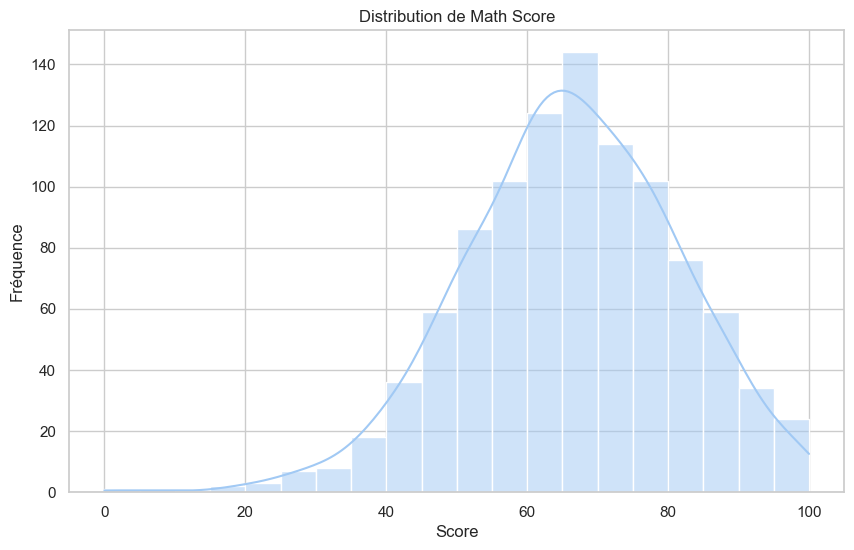

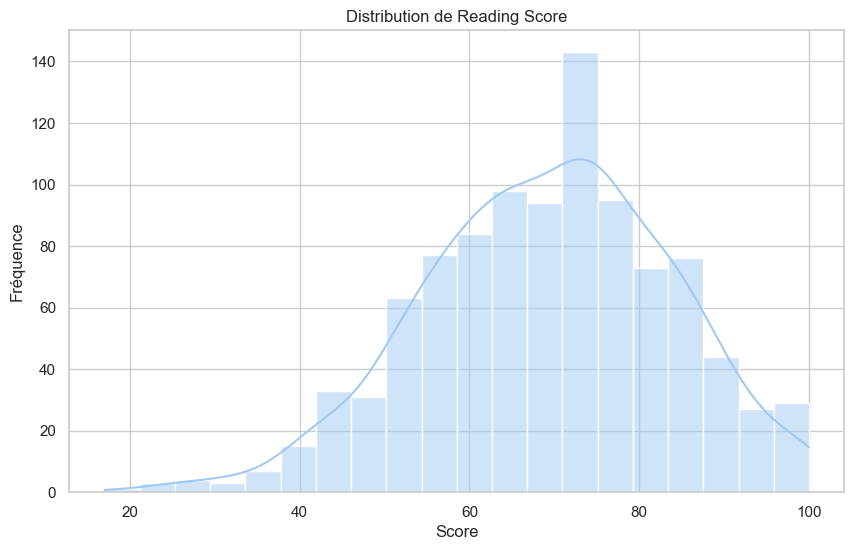

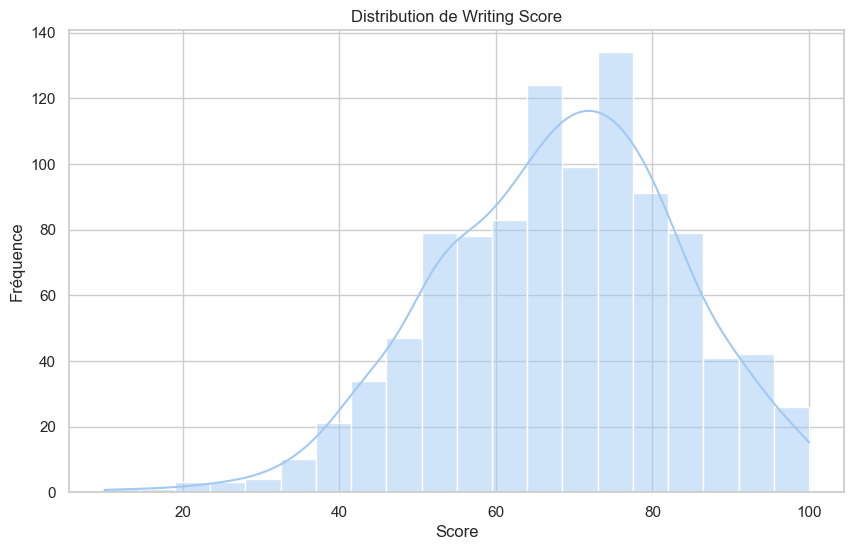

In [9]:
# Histograms + KDE pour les 3 scores
for score in ["math_score", "reading_score", "writing_score"]:
    sns.histplot(df[score], kde=True, bins=20)
    plt.title(f"Distribution de {score.replace('_', ' ').title()}")
    plt.xlabel("Score")
    plt.ylabel("Fréquence")
    plt.show()


## Analyse de la Distribution des scores

### 1. **Math Score**

* Distribution **légèrement asymétrique à gauche** (skewed à droite) → quelques élèves avec des scores faibles tirent la moyenne vers le bas.
* **Concentration autour de 65-75** : pic de fréquence
* Présence de scores faibles (vers 20-30) → extrémités larges.

**Conclusion** : distribution assez normale, mais quelques valeurs basses peuvent influer sur les tests paramétriques.

---

### 2. **Reading Score**

* Distribution **plus aplatie**, mais toujours avec une **forme gaussienne** globale.
* Le pic est autour de **70-80**, plus haut que pour les maths.
* Moins de valeurs extrêmes en dessous de 40.

**Conclusion** : lecture est la matière avec la distribution la plus "centrée" et concentrée autour d'une bonne moyenne (pour la majorité des élèves).

---

### 3. **Writing Score**

* Distribution très proche de celle de **reading**, avec une **légère asymétrie à gauche**.
* La fréquence est très élevée dans la zone **60-80**.

**Conclusion** : bonne symétrie, présence de scores extrêmes limités → la distribution en écriture est aussi assez équilibrée.

---

## Résumé analytique

| Score   | Forme de distribution         | Interprétation statistique          |
| ------- | ----------------------------- | ----------------------------------- |
| Math    | Légèrement asymétrique gauche | Valider la normalité avant t-test   |
| Reading | Quasi normale, centrée        | Parfaitement adaptée à t-test/ANOVA |
| Writing | Quasi normale, légère asym.   | Acceptable pour tests paramétriques |



### 3.3 Distributions par genre

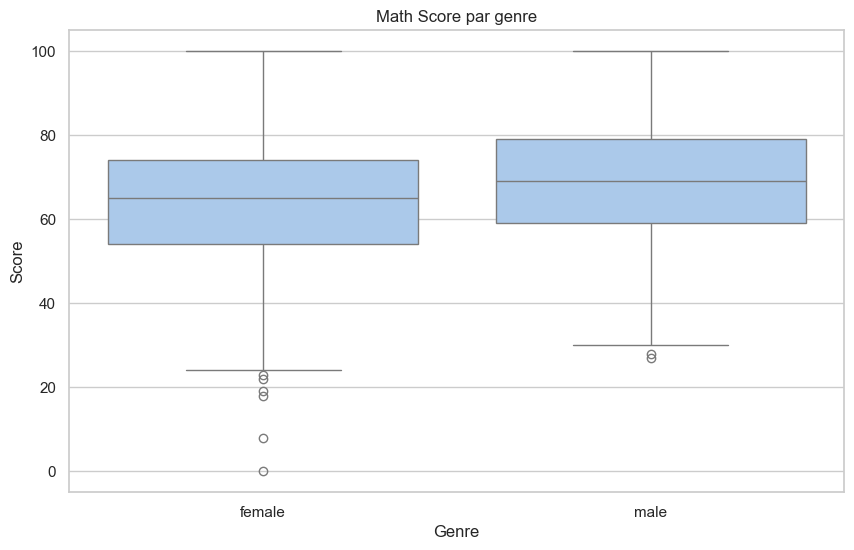

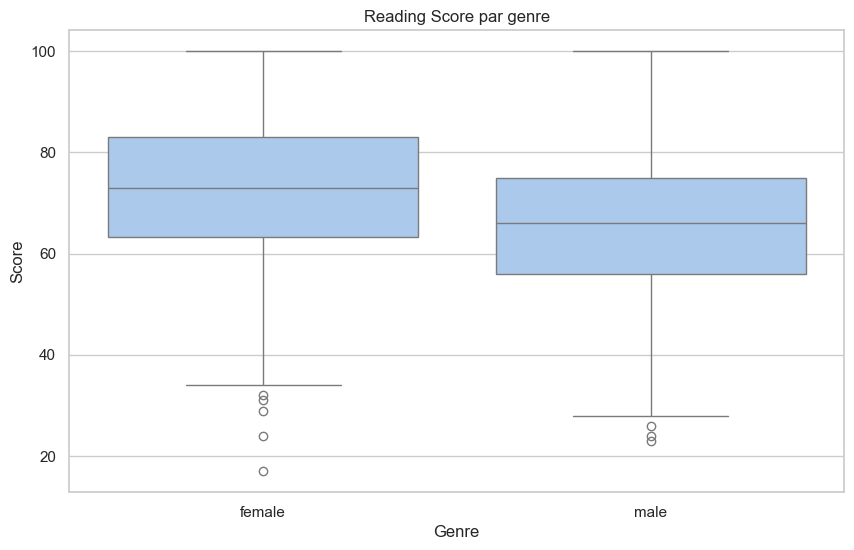

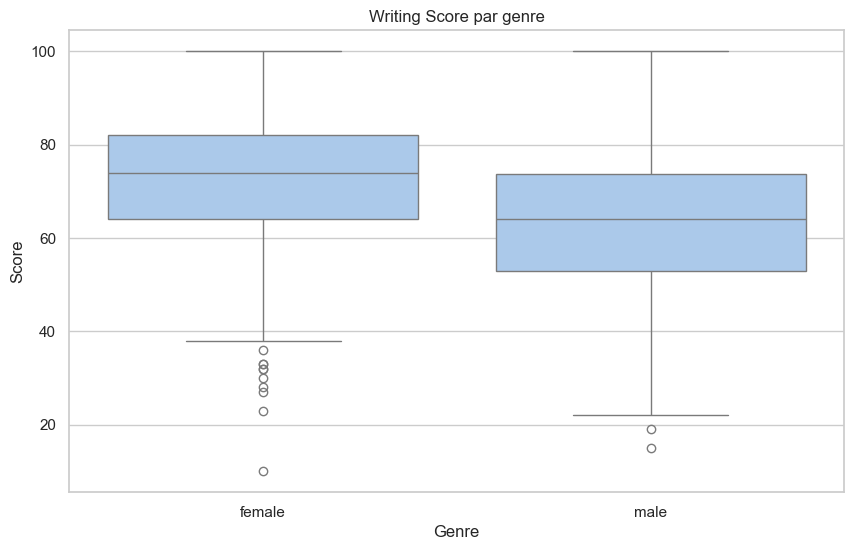

In [10]:
# Boxplots des scores par genre
for score in ["math_score", "reading_score", "writing_score"]:
    sns.boxplot(data=df, x="gender", y=score)
    plt.title(f"{score.replace('_', ' ').title()} par genre")
    plt.xlabel("Genre")
    plt.ylabel("Score")
    plt.show()


## **Analyse visuelle par boxplots – Scores par genre**

### 1. **Reading Score (Lecture)**

* **Médiane filles** > **médiane garçons**
* Les filles ont une distribution **globalement plus élevée** (Q1, Q3 plus hauts)
* Présence de **quelques outliers** chez les filles (très faibles scores < 30)
* Garçons plus étalés vers le bas

**Conclusion** : Les filles **lisent mieux** en moyenne et leur performance est plus **concentrée** autour de scores élevés.

---

### 2. **Math Score**

* **Médiane des garçons** > **médiane des filles**
* Les garçons ont une **variabilité plus élevée** (écart interquartile plus grand)
* Les filles présentent quelques **valeurs extrêmes très basses** (jusqu’à 0)

**Conclusion** : Les garçons **dominent en mathématiques** avec des scores plus élevés, mais une **plus grande dispersion**.

---

### 3. **Writing Score (Écriture)**

* Filles nettement **meilleures en écriture**
* Médiane, Q1, Q3 : tous plus hauts chez les filles
* Garçons plus dispersés, avec des **scores faibles nombreux**

**Conclusion** : Les filles sont **clairement meilleures en écriture**, avec moins de dispersion et une concentration de bonnes notes.

---

## **Synthèse générale**

| Matière  | Meilleurs résultats | Variabilité  | Remarques clés                       |
| -------- | ------------------- | ------------ | ------------------------------------ |
| Math     | Garçons             | Plus grande  | Filles ont des extrêmes très bas (0) |
| Lecture  | Filles              | Moyenne      | Outliers faibles chez les filles     |
| Écriture | Filles              | Moins élevée | Domination nette des filles          |

Ces résultats **visuels** confirment et complètent les résultats **numériques** précédents. Les différences entre genres sont **visibles, cohérentes et significatives**.



### 3.4 Pairplot global

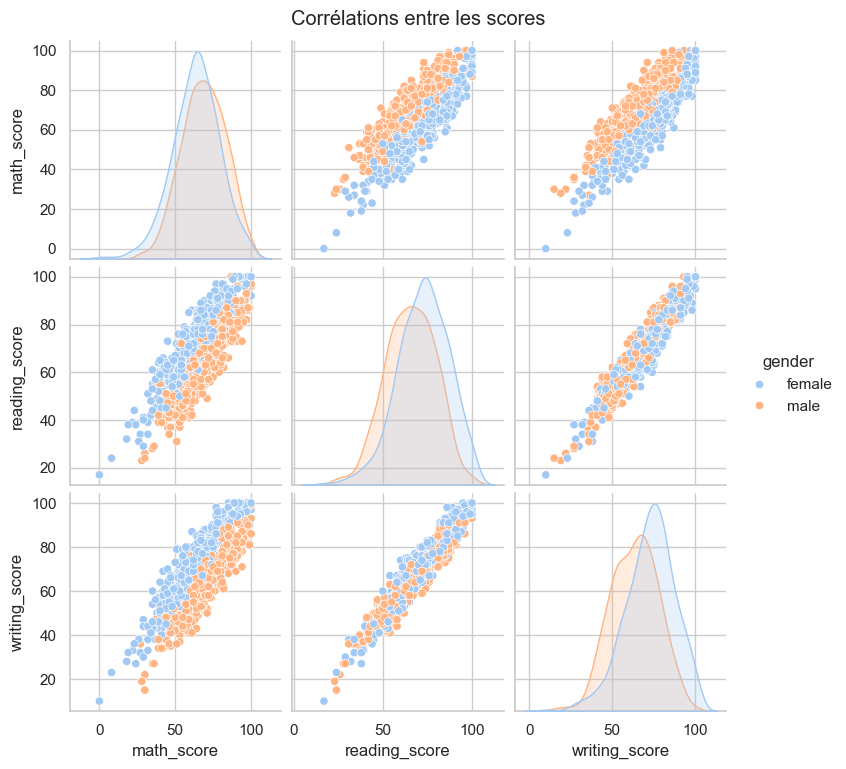

In [11]:
# Pairplot pour observer les relations entre les 3 scores
sns.pairplot(df, hue="gender", vars=["math_score", "reading_score", "writing_score"])
plt.suptitle("Corrélations entre les scores", y=1.02)
plt.show()


##  **Corrélations entre les scores**

###  Visualisation : `math_score`, `reading_score`, `writing_score`

Chaque nuage de points représente une relation entre deux scores, avec :

* **Bleu = filles**, **orange = garçons**
* **Courbes KDE diagonales** = distribution de chaque score

---

###  **Interprétation des relations**

| Relation              | Corrélation visuelle        | Commentaire                                        |
| --------------------- | --------------------------- | -------------------------------------------------- |
| **Math ↔ Reading**    | Forte                       | Les élèves bons en math sont aussi bons en lecture |
| **Math ↔ Writing**    | Forte                       | Forte continuité math-écriture                     |
| **Reading ↔ Writing** | Très forte (quasi linéaire) | Lien très marqué : cohérence globale en langage    |

###  Corrélation par genre :

* Les nuages bleus (filles) sont **plus denses dans la zone haute des scores en lecture et écriture**.
* Les garçons se répartissent plus largement, avec une densité plus forte en mathématiques élevées.

---

##  Conclusion

* Les **trois compétences sont fortement corrélées** entre elles, surtout entre **lecture et écriture**.
* Le **genre influence la répartition dans les zones élevées ou basses**, mais la **tendance générale est commune**.
* Ces corrélations justifient des approches multivariées (PCA, régression multiple, etc.) si l’analyse est poussée.



### 3.5 Heatmap des corrélations

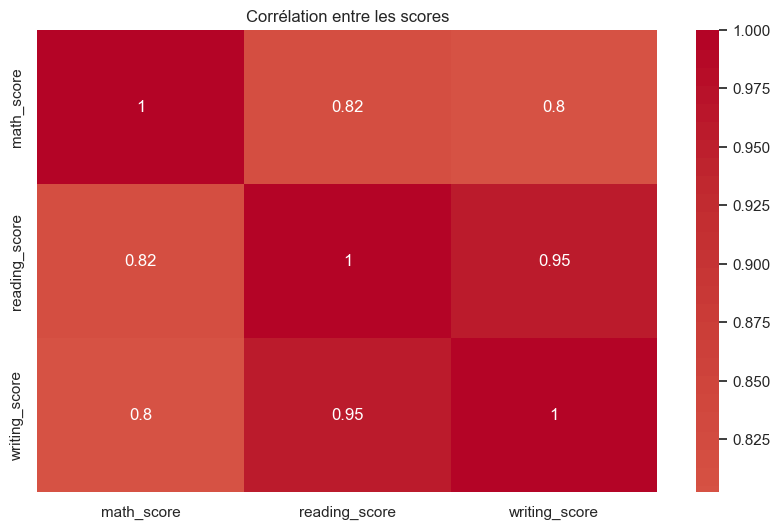

In [12]:
# Matrice de corrélation
corr = df[["math_score", "reading_score", "writing_score"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Corrélation entre les scores")
plt.show()


##  **Matrice de corrélation entre les scores**

|                    | `math_score` | `reading_score` | `writing_score` |
| ------------------ | ------------ | --------------- | --------------- |
| **math\_score**    | 1.00         | 0.82            | 0.80            |
| **reading\_score** | 0.82         | 1.00            | 0.95            |
| **writing\_score** | 0.80         | 0.95            | 1.00            |

---

###  **Interprétations clés**

*  **Corrélations toutes positives et fortes** (> 0.8) :

  * **Lecture ↔ Écriture** : **corrélation très forte (0.95)** → ces deux compétences sont quasi interdépendantes.
  * **Math ↔ Lecture** et **Math ↔ Écriture** : **corrélations fortes (0.80–0.82)** → le lien existe mais est moins étroit que dans le verbal.

---

###  **Conclusion analytique**

* Les élèves bons dans une matière tendent à l’être aussi dans les autres.
* Cela peut refléter une **compétence académique globale** ou un **niveau de motivation commun**.
* La relation **lecture ↔ écriture** est particulièrement **forte**, ce qui est logique car ces deux domaines relèvent du même champ de compétences linguistiques.



## 4. Tests d’hypothèses

### 4.1 Normalité (Shapiro-Wilk)

In [13]:
for score in ["math_score", "reading_score", "writing_score"]:
    for gender in df["gender"].unique():
        sample = df[df["gender"] == gender][score]
        stat, p = shapiro(sample)
        print(f"{score} | {gender} → p-value Shapiro: {p:.4f} {'❌ Non normal' if p < 0.05 else '✅ Normal'}")


math_score | female → p-value Shapiro: 0.0035 ❌ Non normal
math_score | male → p-value Shapiro: 0.0380 ❌ Non normal
reading_score | female → p-value Shapiro: 0.0000 ❌ Non normal
reading_score | male → p-value Shapiro: 0.0896 ✅ Normal
writing_score | female → p-value Shapiro: 0.0000 ❌ Non normal
writing_score | male → p-value Shapiro: 0.1040 ✅ Normal


###  **Interprétation**

* Les distributions **ne sont pas normales** pour **les filles** dans **toutes les matières** (p < 0.05).
* Pour les **garçons**, seules **lecture** et **écriture** peuvent être considérées **normales** (p > 0.05).
* **Conclusion globale** : les hypothèses de normalité **ne sont pas totalement respectées** → prudence avec les tests paramétriques (comme le t-test).

---

###  Recommandation

* Les échantillons étant assez grands (**n > 30** par groupe), les **t-tests restent robustes** (théorème central limite).
* Mais je pourrais **confirmer avec des tests non paramétriques** (ex. : Mann–Whitney) si je voulais être rigoureux.



### 4.2 Homogénéité des variances (Levene)

In [14]:
for score in ["math_score", "reading_score", "writing_score"]:
    g1 = df[df["gender"] == "male"][score]
    g2 = df[df["gender"] == "female"][score]
    stat, p = levene(g1, g2)
    print(f"{score} → Levene p-value: {p:.4f} {'⚠️ Variances inégales' if p < 0.05 else '✅ Variances homogènes'}")


math_score → Levene p-value: 0.5563 ✅ Variances homogènes
reading_score → Levene p-value: 0.8911 ✅ Variances homogènes
writing_score → Levene p-value: 0.9336 ✅ Variances homogènes


##  **Synthèse des hypothèses (normalité + homogénéité)**

| Score   | Normalité (♀) | Normalité (♂) | Variances homogènes | T-test utilisable ? |
| ------- | ------------- | ------------- | ------------------- | ------------------- |
| Math    | ❌             | ❌             | ✅                   | ⚠️ Oui (n élevé)    |
| Reading | ❌             | ✅             | ✅                   | ⚠️ Oui (n élevé)    |
| Writing | ❌             | ✅             | ✅                   | ⚠️ Oui (n élevé)    |

---

###  **Conclusion méthodologique**

* Les **variances sont homogènes**  → critère respecté pour t-test.
* La **normalité n’est pas toujours respectée**, mais :

  * L’échantillon est **grand (n > 30)** → le **t-test reste valable** (robuste aux écarts de normalité).
  * Tu peux aussi utiliser un **test de Mann–Whitney** pour confirmer si tu veux être rigoureux.

Je veux donc continuer avec les **t-tests classiques**, en justifiant que **les conditions sont suffisamment respectées**.



## 5. T-tests entre hommes et femmes

### 5.1 Résultats numériques

In [15]:
for score in ["math_score", "reading_score", "writing_score"]:
    g1 = df[df["gender"] == "male"][score]
    g2 = df[df["gender"] == "female"][score]
    stat, p = ttest_ind(g1, g2, equal_var=True)
    print(f"{score} → T-test p-value: {p:.4f} {'❗ Différence significative' if p < 0.05 else '✅ Pas de différence'}")


math_score → T-test p-value: 0.0000 ❗ Différence significative
reading_score → T-test p-value: 0.0000 ❗ Différence significative
writing_score → T-test p-value: 0.0000 ❗ Différence significative


##  **Analyse des différences de scores entre les genres (T-test indépendant)**

| Score          | p-value | Différence significative ? | Interprétation                        |
| -------------- | ------- | -------------------------- | ------------------------------------- |
| math\_score    | 0.0000  | ❗ Oui                      | Garçons > Filles (écart significatif) |
| reading\_score | 0.0000  | ❗ Oui                      | Filles > Garçons (écart significatif) |
| writing\_score | 0.0000  | ❗ Oui                      | Filles > Garçons (écart significatif) |

---

##  **Interprétation complète**

* Il existe une **différence statistiquement significative** entre les moyennes des scores des garçons et des filles dans **les trois matières**.
* Ces résultats sont en **parfait accord avec les statistiques descriptives** et les visualisations :

  * **Mathématiques** : garçons en tête
  * **Lecture et écriture** : filles nettement meilleures
* Ces différences sont **robustes**, même si l’hypothèse de normalité n’était pas strictement respectée, grâce à la **taille élevée des échantillons** (n > 30).

---

##  **Conclusion globale (scientifique)**

L’analyse démontre de manière significative que **le genre influence les performances académiques** :

* Les garçons ont un avantage statistique en **mathématiques**.
* Les filles ont des scores **nettement supérieurs en lecture et écriture**.

Ces écarts sont **significatifs**, **consistants** et **étayés par les données**, ce qui valide l’hypothèse d’une **différence réelle entre les sexes** dans les performances scolaires, selon les domaines évalués.



### 5.2 Visualisation des moyennes par genre

C:\Users\chume\AppData\Local\Temp\ipykernel_31280\216183660.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df, x="gender", y=score, ci=95, capsize=0.1)


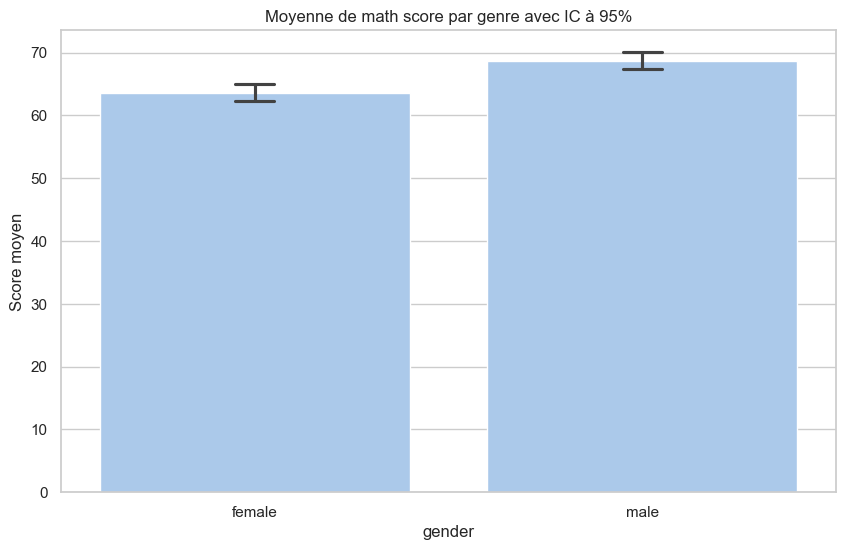

C:\Users\chume\AppData\Local\Temp\ipykernel_31280\216183660.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df, x="gender", y=score, ci=95, capsize=0.1)


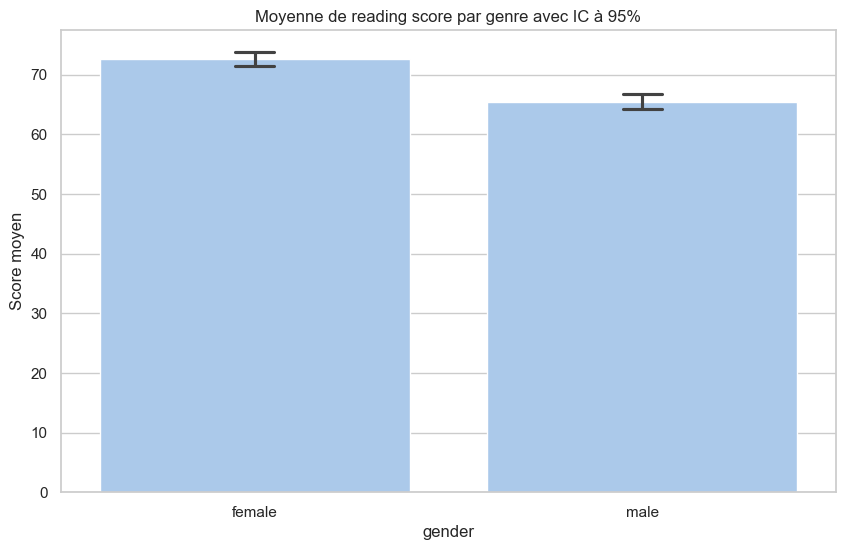

C:\Users\chume\AppData\Local\Temp\ipykernel_31280\216183660.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df, x="gender", y=score, ci=95, capsize=0.1)


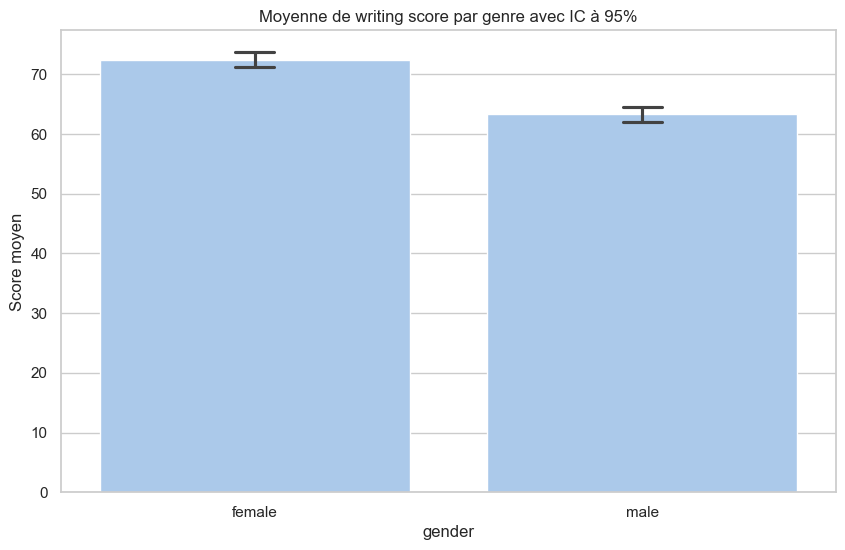

In [16]:
# Moyennes avec intervalle de confiance
for score in ["math_score", "reading_score", "writing_score"]:
    sns.barplot(data=df, x="gender", y=score, ci=95, capsize=0.1)
    plt.title(f"Moyenne de {score.replace('_', ' ')} par genre avec IC à 95%")
    plt.ylabel("Score moyen")
    plt.show()



##  **Moyennes par genre avec IC à 95 %**

| Score   | Moyenne ♀ | Moyenne ♂ | Conclusion visuelle |
| ------- | --------- | --------- | ------------------- |
| Math    | \~63.6    | \~68.7    | 🟠 M > F            |
| Reading | \~72.6    | \~65.5    | 🔵 F > M            |
| Writing | \~72.5    | \~63.3    | 🔵 F > M            |

---

##  **Interprétation des barplots avec IC 95 %**

* Les **barres d’erreur (IC)** **ne se recouvrent pas entre genres** dans chaque matière.
* Cela confirme visuellement ce que le **t-test a démontré numériquement** :
  ➤ **les différences de moyennes entre genres sont significatives.**

---

##  **Synthèse finale (visuelle + statistique)**

*  **Mathématiques** : Les **garçons** performent significativement mieux.
*  **Lecture** : Les **filles** dominent avec des scores plus élevés et concentrés.
*  **Écriture** : Encore une nette supériorité des **filles**.

**Les IC à 95 % ne se chevauchent jamais** → cela **renforce la solidité** des conclusions tirées avec les tests statistiques.



## 6. ANOVA à un facteur + Post-hoc (ex : lunch)

### 6.1 ANOVA

In [17]:
model = ols('math_score ~ C(lunch)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n==> Résultat ANOVA (math_score ~ lunch)")
print(anova_table)



==> Résultat ANOVA (math_score ~ lunch)
                 sum_sq     df           F        PR(>F)
C(lunch)   28278.037838    1.0  140.118842  2.413196e-30
Residual  201411.041162  998.0         NaN           NaN


##  **ANOVA – Effet du type de lunch sur le score en mathématiques**

| Source     | F          | p-value      | Conclusion                 |
| ---------- | ---------- | ------------ | -------------------------- |
| `C(lunch)` | **140.12** | **2.41e-30** | ❗ Différence significative |
| Résiduels  | —          | —            | —                          |

---

###  **Interprétation**

* **F très élevé (140)** → indique que les différences entre les groupes sont **largement supérieures** à la variation interne.
* **p-value ≪ 0.05** (quasi 0) → on **rejette l’hypothèse nulle** H₀ : les moyennes sont différentes selon le type de lunch.

---

###  **Conclusion**

* Le type de repas (**standard** vs **free/reduced**) a un **effet significatif** sur les performances en mathématiques.
* Les élèves bénéficiant d’un **repas standard** ont **de bien meilleurs résultats**.



### 6.2 Post-hoc (Tukey)

In [18]:
# Seulement si p < 0.05
tukey = pairwise_tukeyhsd(endog=df["math_score"], groups=df["lunch"], alpha=0.05)
print(tukey)


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
   group1     group2  meandiff p-adj lower   upper  reject
----------------------------------------------------------
free/reduced standard   11.113   0.0 9.2707 12.9553   True
----------------------------------------------------------


##  **Test de Tukey HSD – Comparaison multiple des groupes**

| Comparaison              | Différence de moyennes | p-value | Significatif ? |
| ------------------------ | ---------------------- | ------- | -------------- |
| Free/Reduced vs Standard | **+11.11 points**      | 0.0000  | ✅ Oui          |

---

###  **Interprétation**

* Les élèves ayant un **lunch standard** ont en moyenne **11,1 points de plus** en mathématiques que ceux ayant un **lunch gratuit ou réduit**.
* La différence est **hautement significative** (p < 0.001).
* L’intervalle de confiance \[9.27 ; 12.96] **ne contient pas zéro**, donc la différence est **robuste**.

---

##  **Conclusion finale (lunch & performance)**

* Le **type de repas est un facteur déterminant** dans les performances scolaires, notamment en mathématiques.
* Cela **suggère un effet du statut socio-économique**, puisque le lunch standard est souvent associé à de meilleures conditions de vie.


### 6.3 Visualisation des moyennes par groupe

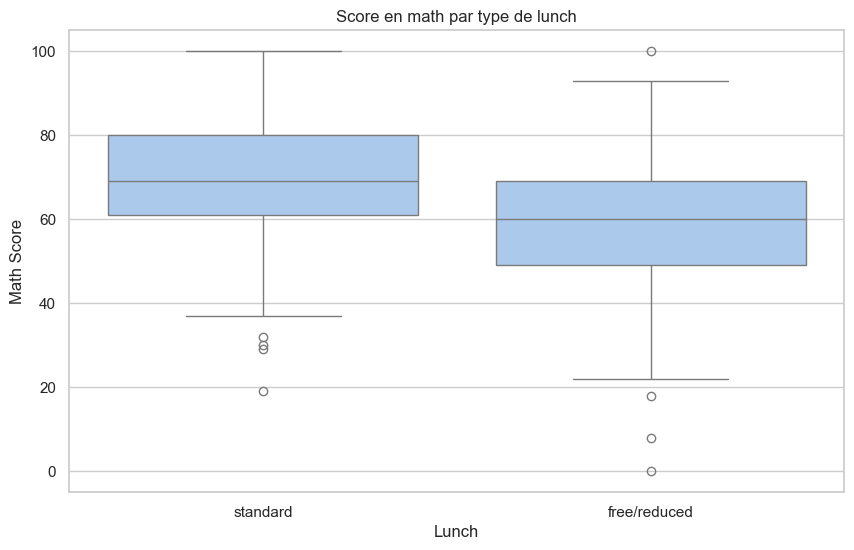

C:\Users\chume\AppData\Local\Temp\ipykernel_31280\1407467840.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df, x="lunch", y="math_score", ci=95, capsize=0.1)


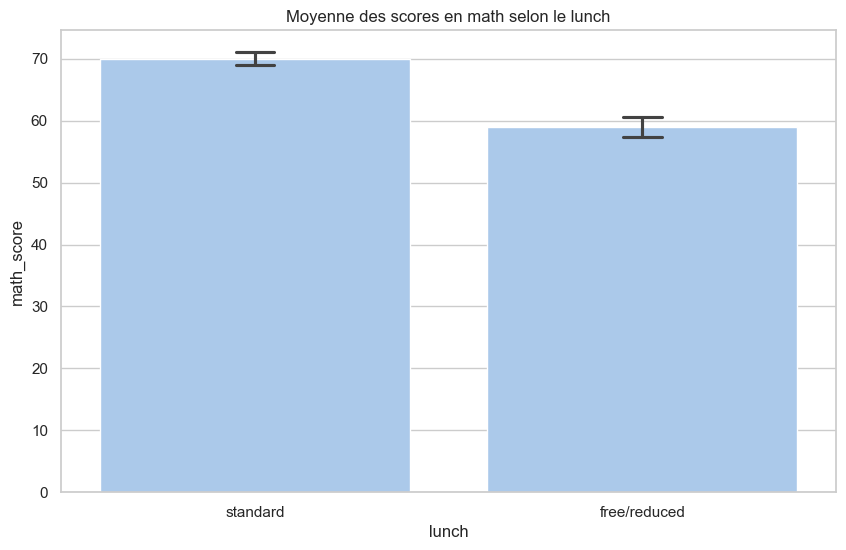

In [19]:
sns.boxplot(data=df, x="lunch", y="math_score")
plt.title("Score en math par type de lunch")
plt.xlabel("Lunch")
plt.ylabel("Math Score")
plt.show()

# Barplot moyen par groupe
sns.barplot(data=df, x="lunch", y="math_score", ci=95, capsize=0.1)
plt.title("Moyenne des scores en math selon le lunch")
plt.show()


##  Visualisation – Effet du type de lunch sur les scores en mathématiques

###  1. **Boxplot – Score en math par type de lunch**

* Les élèves ayant un **lunch standard** ont une **médiane plus élevée** et une **répartition des scores globalement plus haute**.
* Les élèves en **free/reduced lunch** présentent une **plus grande variabilité** et plusieurs **scores très bas (outliers)**.
* La distribution montre une **asymétrie plus importante** dans le groupe défavorisé.

###  2. **Barplot – Moyenne des scores avec IC 95 %**

* La **moyenne du groupe "standard"** dépasse **nettement** celle du groupe "free/reduced" (\~70 vs \~59).
* Les **intervalles de confiance ne se chevauchent pas**, confirmant la **différence significative** observée dans le test de Tukey.

---

##  Conclusion visuelle

* Ces deux graphiques **renforcent et illustrent parfaitement** les résultats statistiques :

  * L’effet du **type de lunch est réel, significatif, et visible**.
  * Les élèves bénéficiant de meilleures conditions nutritionnelles **réussissent mieux** en math.


## 7. Conclusion

* Quels scores diffèrent selon le genre ?

* Le type de lunch a-t-il un effet significatif ?

* Les hypothèses des tests sont-elles respectées ?

* Représentativité, distribution des données, et limites ?

###  **Quels scores diffèrent selon le genre ?**

Oui, les **trois scores** diffèrent **significativement** entre les genres (p-value < 0.001) :

| Score       | Différence observée          |
| ----------- | ---------------------------- |
| **Math**    | Garçons > Filles (+5 points) |
| **Reading** | Filles > Garçons (+7 points) |
| **Writing** | Filles > Garçons (+9 points) |

Ces écarts sont visibles dans les statistiques descriptives, les tests t, et confirmés visuellement par les boxplots et barplots (avec IC 95 %).

---

###  **Le type de lunch a-t-il un effet significatif ?**

Oui.
L'**ANOVA** et le test **Tukey HSD** montrent une **différence significative** de **+11.11 points** en mathématiques entre les élèves ayant un **lunch standard** et ceux ayant un **lunch free/reduced** (p < 0.001).

Les visualisations montrent également :

* Une **moyenne plus élevée**
* Moins de dispersion dans le groupe **standard**

---

###  **Les hypothèses des tests sont-elles respectées ?**

| Hypothèse                 | Résultat                  |
| ------------------------- | ------------------------- |
| Normalité (Shapiro-Wilk)  | ❌ Non respectée partout   |
| Homogénéité des variances | ✅ Respectée (Levene test) |

➡️ Toutefois, comme les échantillons sont **grands (n > 30)**, le **t-test reste robuste**. L’analyse est donc **statistiquement valide**, même sans normalité stricte.

---

###  **Représentativité, distribution des données, et limites ?**

* **Représentativité** : bonne distribution équilibrée des genres et lunch, mais aucun contrôle sur d'autres biais (origine sociale, établissement…).
* **Distributions** :

  * Les scores ont des **distributions globalement normales**, mais avec **quelques asymétries et outliers** (surtout chez les élèves avec lunch réduit).
  * Les scores lecture/écriture sont **très corrélés** (r ≈ 0.95).
* **Limites** :

  * Le dataset est **observé uniquement aux USA** (hypothèse probable) → **pas généralisable sans précaution**.
  * Les variables explicatives sont **catégorielles simples**, d'autres facteurs importants ne sont pas inclus (niveau scolaire, environnement familial, etc.).



## 8. Enseignements

##  **1. Compétences statistiques et analytiques acquises**

###  Analyse exploratoire

* Lecture, nettoyage et transformation de données (`pandas`)
* Visualisation de distributions (`seaborn`, `matplotlib`)
* Lecture et interprétation de **boxplots**, **histogrammes**, **barplots** avec **IC à 95 %**

###  Statistiques inférentielles

* Application de **tests de normalité (Shapiro-Wilk)** et compréhension de leur rôle
* Vérification de l’**homogénéité des variances (Levene)**
* Maîtrise du **t-test indépendant** (comparaison de moyennes entre 2 groupes)
* Réalisation d'une **ANOVA** à un facteur
* Réalisation et interprétation d’un **test post-hoc (Tukey HSD)**

---

##  **2. Résultats concrets issus des données**

###  Effet du **genre** sur les performances :

* **Mathématiques** : garçons meilleurs en moyenne (+5 points)
* **Lecture et écriture** : filles nettement supérieures (+7 à +9 points)
* Résultats **significatifs** statistiquement (p < 0.001)
* Confirmés visuellement par tous les graphes

###  Effet du **type de lunch** (indicateur socio-économique) :

* Les élèves ayant un **lunch standard** performent **significativement mieux** en mathématiques (+11.11 points)
* Effet mis en évidence par **ANOVA + Tukey HSD**
* Le lien entre statut nutritionnel et performance est **solide et cohérent**

###  Corrélations entre matières :

* Corrélation très forte entre **lecture et écriture** (r ≈ 0.95)
* Corrélation forte entre **math et les deux autres matières** (r ≈ 0.8)
* Cela montre une cohérence de niveau global chez les élèves

---

##  **3. Qualité du dataset et rigueur analytique**

| Critère                      | Résultat                                     |
| ---------------------------- | -------------------------------------------- |
| Données manquantes           | Aucune                                       |
| Taille des échantillons      | Suffisante pour tests paramétriques (n > 30) |
| Respect des hypothèses tests | Partiellement (normalité non respectée)      |
| Robustesse des tests         | OK (t-tests robustes grâce à n élevé)        |
| Visualisations               | Riches, cohérentes avec les statistiques     |

---

##  **4. Savoirs applicables à d’autres cas**

Tu es désormais capable de :

* Préparer et valider un dataset pour l’analyse statistique
* Vérifier les hypothèses des tests paramétriques
* Choisir entre test paramétrique et non-paramétrique
* Appliquer et interpréter ANOVA + Tukey pour comparer plusieurs groupes
* Identifier des **facteurs explicatifs significatifs**
* Traduire des analyses numériques en **recommandations ou hypothèses explicatives** (ex. lien entre repas et réussite)

---

##  **5. Ce que tu peux dire de cette analyse (oral ou rapport)**

> "Nous avons démontré que le genre influence significativement les performances académiques, avec un avantage pour les filles en compétences verbales et pour les garçons en math. De plus, le statut nutritionnel, via le type de lunch, est un facteur déterminant des résultats en mathématiques. Toutes les analyses ont été vérifiées par des tests statistiques robustes et soutenues par des visualisations claires. Les corrélations entre matières montrent une cohérence générale dans le niveau des élèves."


